In [113]:
import requests
from bs4 import BeautifulSoup as bs
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import wordcloud
from nltk.corpus import stopwords

In [114]:
import nltk
nltk.download('vader_lexion')


[nltk_data] Error loading vader_lexion: Package 'vader_lexion' not
[nltk_data]     found in index


False

In [115]:
url=url ="https://www.amazon.in/product-reviews/B08L5T44CQ/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews#reviews-filter-bar="+str(i)

In [116]:
page=requests.get(url)

In [117]:
page

<Response [200]>

In [118]:
page.content

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n\n<!-- sp:feature:aui-assets -->\n<link rel="stylesheet" href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,41wZkyTaWoL.css,31Y8m1dzTdL.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11bGSgD5pDL.css,01Dm5eKVxwL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,21N4kUH7pxL.css,01oDR3IULNL.css,41CYNGpGlrL.css,01XPHJk60-L.css,114y0SIP+yL.css,21aPhFy+riL.c

In [119]:
iphone_reviews=[]

In [120]:
for i in range (1,21):
    ip=[]
    url ="https://www.amazon.in/product-reviews/B08L5T44CQ/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews#reviews-filter-bar="+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    iphone_reviews = iphone_reviews+ip

In [121]:
# wrting the reives in the text file
with open("iphone.txt","w",encoding='utf-8')as output:
    output.write(str(iphone_reviews))

In [122]:
import os
os.getcwd()

'C:\\Users\\Hp\\Desktop\\11. Text Mining'

In [123]:
# joing the reives into one paragraph
si_strn=" ".join(iphone_reviews)
si_strn

"\n\n  The iPhone 12 Pro has three cameras against the two in the iPhone 12. So there is an extra 12MP telephoto lens along with the 12MP wide and ultra wide cameras seen on the iPhone 12. Interestingly, the telephoto and the ultra wide cameras have not really changed from the iPhone 11 times. One of the best looking phone in the market right now with a decent performance jump from 11 pro. Camera is excellent and the display is quite responsive and sharp. Only issue is it does not have a higher refresh rate but you won't feel that in a tiny bit!! Go for it!!So far the the battery is just ok I really expected longer life. So far so good!!\n\n \n\n  Just made an upgrade from iPhone X to iPhone 12 pro, and I’m simply so blown away by the camera of this phone, the quality of the picture it takes is so very near to that of a high end digital camera. The portrait mode, the night mode, the regular mode, wow, everything just got so much better. This is truly a camera king smartphone available 

In [124]:
# lets remove the unwanted characters

si_strn = re.sub("[^A-Za-z" "]+"," ",si_strn).lower()
si_strn =re.sub("[0-9" "]+"," ",si_strn)
#return(single_string)

In [125]:
si_strn

' the iphone pro has three cameras against the two in the iphone so there is an extra mp telephoto lens along with the mp wide and ultra wide cameras seen on the iphone interestingly the telephoto and the ultra wide cameras have not really changed from the iphone times one of the best looking phone in the market right now with a decent performance jump from pro camera is excellent and the display is quite responsive and sharp only issue is it does not have a higher refresh rate but you won t feel that in a tiny bit go for it so far the the battery is just ok i really expected longer life so far so good just made an upgrade from iphone x to iphone pro and i m simply so blown away by the camera of this phone the quality of the picture it takes is so very near to that of a high end digital camera the portrait mode the night mode the regular mode wow everything just got so much better this is truly a camera king smartphone available on the market right now if you are a photographer or love

In [126]:
# tokenizing the reviews with the space
si_strn_words=si_strn.split(" ")

In [130]:
from nltk.corpus import stopwords
stop= stopwords.words('english')
si_strn_words=[x for x in si_strn_words if  not x  in stop]

In [131]:
# form the wordsinto whole string 
si_strn_stirng=" ".join(si_strn_words)
si_strn_stirng

' iphone pro three cameras two iphone extra mp telephoto lens along mp wide ultra wide cameras seen iphone interestingly telephoto ultra wide cameras really changed iphone times one best looking phone market right decent performance jump pro camera excellent display quite responsive sharp issue higher refresh rate feel tiny bit go far battery ok really expected longer life far good made upgrade iphone x iphone pro simply blown away camera phone quality picture takes near high end digital camera portrait mode night mode regular mode wow everything got much better truly camera king smartphone available market right photographer loves taking pictures think jump straight eyes closed get phone cons find phone battery tends shorter side everything near perfection best iphone yet camera display amazing premium product display world ui smoother android smartphones camera phenomenal battery easily lasts day since heavy user even game much felt heating issues well never used iphone think ever mo

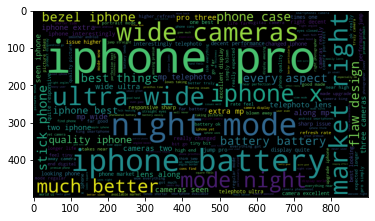

In [132]:
# bliud the wordcloud for the string
from wordcloud import WordCloud
word_cloud_string=WordCloud(background_color='Black',width=900,height=500).generate(si_strn_stirng)
plt.imshow(word_cloud_string)

In [136]:
# now considering the poistive 
with open("positive-words.txt","r") as pos:
    pos_words=pos.read().split('\n')
    
    pos_words=pos_words[36:]
    

In [137]:
# now considerng the negative words in the sysytem
with open("negative-words.txt",'r')as neg:
    neg_words=neg.read().split('\n')
    neg_words=neg_words[37:]

In [144]:
#lets consider the unqiue words
stg_unique= list(set(" ".join(iphone_reviews).split(" ")))

In [145]:
stg_unique

['',
 'avoid',
 'just',
 'office',
 'ever',
 'edges',
 'nothing',
 'Those',
 '11',
 'From',
 'to',
 'One',
 'illness,',
 'product\n\n',
 'single',
 'takes',
 'Interestingly,',
 'design',
 'who',
 'professional',
 'imaging',
 'really',
 'truly',
 'shorter',
 'on',
 'smaller',
 'angles.',
 'best',
 'android',
 'feels',
 'pro,',
 'stands',
 'many',
 'these',
 'tasks',
 'and',
 'battery!!!.',
 'X',
 'The',
 'heating',
 'Many',
 'other',
 'border',
 'pic.This',
 'smartphones.',
 'injuries.',
 'month',
 'side,',
 'pro',
 'one',
 'seen',
 'Just',
 "won't",
 'stylish.The',
 'need',
 'than',
 'VerdictOverall,',
 'looks',
 'penny',
 'Please',
 'dslr.\n\n',
 'or',
 'you',
 'night',
 'received',
 'device.',
 'in',
 'right-angled',
 '2020',
 'writing',
 'UI',
 'Finish',
 'video',
 'square,',
 'smartphone,as',
 'better',
 'Is',
 'edges.',
 'was',
 'particularly',
 'will',
 'great',
 'Battery',
 'I',
 'camera',
 'view,',
 'has',
 'better.',
 'aspects.It',
 'continuous',
 'miles',
 'tightening',
 'iPh

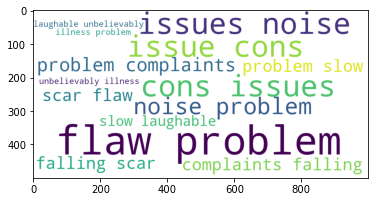

In [151]:
# word cloud for the negative  words
neg_word_string=" ".join([w for w  in si_strn_words if  w in neg_words])
from wordcloud import WordCloud
worcloud_neg=WordCloud(background_color="white",width=1000,height=500).generate(neg_word_string)
plt.imshow(worcloud_neg)

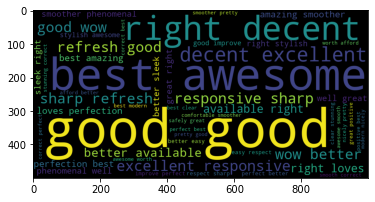

In [155]:
# word cloud for the positve words
from wordcloud import WordCloud
pos_word_string=" ".join([w for w in si_strn_words if w in pos_words])
word_cloud_pos=WordCloud(background_color='black',width=1000,height=500).generate(pos_word_string)
plt.imshow(word_cloud_pos)

In [156]:
# emotion mining


In [157]:
import pandas as pd
afin=pd.read_csv("Afinn.csv.xls")
afin.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [159]:
# lest tokenzie
from nltk import tokenize
stg_unique=tokenize.sent_tokenize(" ".join(iphone_reviews))
stg_unique

['\n\n  The iPhone 12 Pro has three cameras against the two in the iPhone 12.',
 'So there is an extra 12MP telephoto lens along with the 12MP wide and ultra wide cameras seen on the iPhone 12.',
 'Interestingly, the telephoto and the ultra wide cameras have not really changed from the iPhone 11 times.',
 'One of the best looking phone in the market right now with a decent performance jump from 11 pro.',
 'Camera is excellent and the display is quite responsive and sharp.',
 "Only issue is it does not have a higher refresh rate but you won't feel that in a tiny bit!!",
 'Go for it!',
 '!So far the the battery is just ok I really expected longer life.',
 'So far so good!!',
 'Just made an upgrade from iPhone X to iPhone 12 pro, and I’m simply so blown away by the camera of this phone, the quality of the picture it takes is so very near to that of a high end digital camera.',
 'The portrait mode, the night mode, the regular mode, wow, everything just got so much better.',
 'This is truly

In [161]:
stg_unique_df=pd.DataFrame(stg_unique,columns=["sentence"])  # converting into the dataframe
stg_unique_df.head()

,sentence
0,\n\n The iPhone 12 Pro has three cameras agai...
1,So there is an extra 12MP telephoto lens along...
2,"Interestingly, the telephoto and the ultra wid..."
3,One of the best looking phone in the market ri...
4,Camera is excellent and the display is quite r...


In [162]:
afin_scores=afin.set_index('word')['value'].to_dict()
afin_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [166]:
import spacy

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 88 from PyObject


In [173]:
# calculate the score of the each sentence
nlp=spacy.load('en_core_web_sm')

sentiment_lexicon=afin_scores
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [174]:
stg_unique_df['sentiment']=stg_unique_df['sentence'].apply(calculate_sentiment)
stg_unique_df

,sentence,sentiment
0,\n\n The iPhone 12 Pro has three cameras agai...,0
1,So there is an extra 12MP telephoto lens along...,0
2,"Interestingly, the telephoto and the ultra wid...",0
3,One of the best looking phone in the market ri...,3
4,Camera is excellent and the display is quite r...,5
...,...,...
1249,I have Prebooked this iPhone12 pro and receive...,0
1250,This iPhone 12pro Is the best in all the thing...,11
1251,In Night Mode there is correct balance of ligh...,5
1252,The video is so smooth with correct audio.When...,2


In [175]:
# how many words are in the sentence?
stg_unique_df['word_count'] = stg_unique_df['sentence'].str.split().apply(len)
stg_unique_df['word_count'].head(10)

0    14
1    22
2    17
3    19
4    11
5    20
6     3
7    13
8     4
9    42
Name: word_count, dtype: int64

In [178]:
stg_unique_df.sort_values(by='sentiment').tail(10)

,sentence,sentiment,word_count
194,This iPhone 12pro Is the best in all the thing...,11,41
986,This iPhone 12pro Is the best in all the thing...,11,41
128,This iPhone 12pro Is the best in all the thing...,11,41
1052,This iPhone 12pro Is the best in all the thing...,11,41
524,This iPhone 12pro Is the best in all the thing...,11,41
1118,This iPhone 12pro Is the best in all the thing...,11,41
458,This iPhone 12pro Is the best in all the thing...,11,41
62,This iPhone 12pro Is the best in all the thing...,11,41
788,This iPhone 12pro Is the best in all the thing...,11,41
920,This iPhone 12pro Is the best in all the thing...,11,41


In [179]:
stg_unique_df['index']=range(0,len(stg_unique_df))

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment', ylabel='Density'>

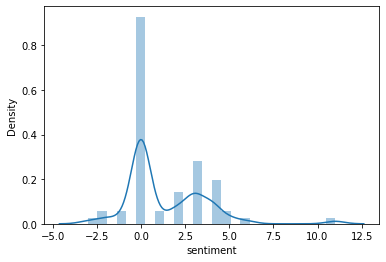

In [181]:
sns.distplot(stg_unique_df['sentiment'])

<AxesSubplot:xlabel='index', ylabel='sentiment'>

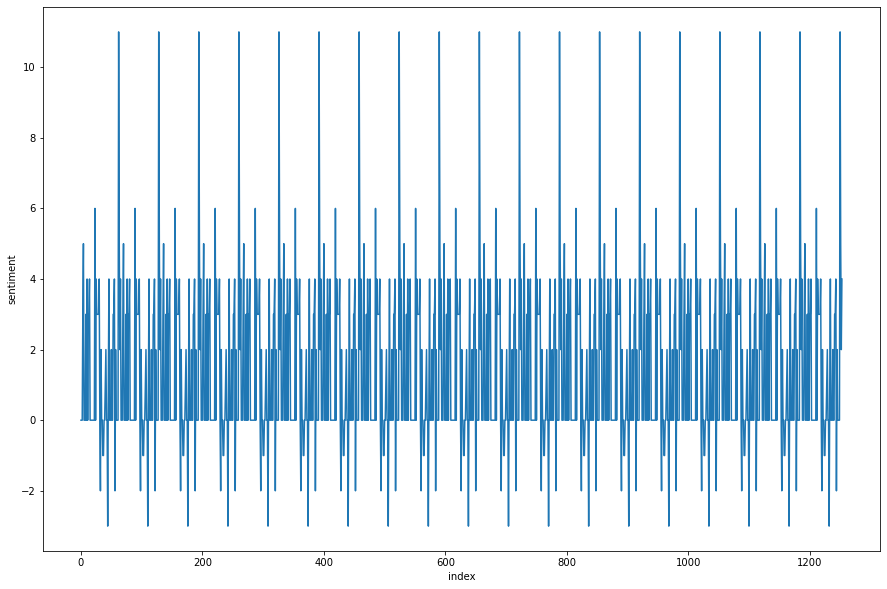

In [182]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment',x='index',data=stg_unique_df)

<AxesSubplot:title={'center':'Sentence sentiment  to sentence word count'}, xlabel='word_count', ylabel='sentiment'>

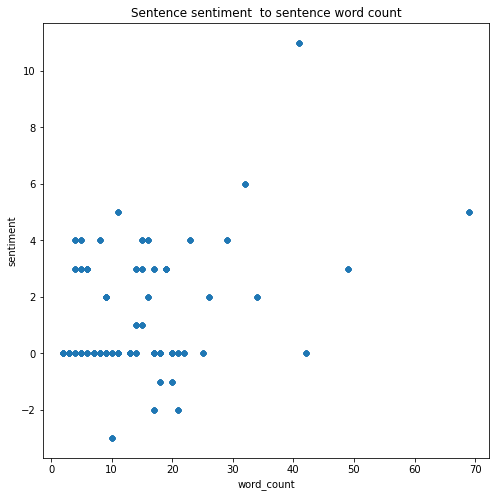

In [184]:
stg_unique_df.plot.scatter(x='word_count', y='sentiment', figsize=(8,8), title='Sentence sentiment  to sentence word count')

In [185]:
len(pos_word_string)

8494

In [186]:
len(neg_word_string)

2395

In [187]:
len(si_strn_words)

10015